In [1]:
# 必要なライブラリの読み込み
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 日本語フォントの設定
from matplotlib.font_manager import FontProperties
font_path = '/Windows/Fonts/Ricty Diminished.ttf'  #DLしたフォントのパスを指定
font_prop = FontProperties(fname=font_path)

In [2]:
df = pd.read_csv("train.tsv", delimiter='\t' )

In [3]:
df.head(10)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge aries se
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw rabbit custom
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota mark ii
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge colt
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota tercel
5,16,27.0,4,151.0,90.00,2735.0,18.0,82,1,pontiac phoenix
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevroelt chevelle malibu
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile omega
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw 2002
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge st. regis


In [4]:
# 元のDataFrameそのままに加工用にdf2を用意
df2 = df

In [5]:
# スペースで区切った1つ目のブロック＝カーブランドという前提でデータを書き換え
df2["car name"] = df["car name"].str.split(" ").str[0]

In [6]:
df2.head(10)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,vw
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota
5,16,27.0,4,151.0,90.00,2735.0,18.0,82,1,pontiac
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevroelt
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge


In [7]:
# car nameカラムの概要を把握⇒置換が必要だと判定
# ascending=False：降順
df2["car name"].value_counts(ascending=True)

toyouta           1
hi                1
vokswagen         1
capri             1
chevroelt         1
triumph           1
audi              2
mercedes-benz     2
bmw               2
volvo             2
chevy             2
subaru            2
saab              2
peugeot           2
renault           3
opel              3
mazda             3
vw                4
oldsmobile        4
fiat              4
pontiac           5
mercury           6
honda             6
buick             8
volkswagen       10
plymouth         13
toyota           13
datsun           14
amc              16
dodge            18
ford             20
chevrolet        27
Name: car name, dtype: int64

In [8]:
# ノイズデータを置換
df2["car name"] = df2["car name"].replace({
    "vw":"volkswagen",
    "vokswagen":"volkswagen",
    "toyouta":"toyota",
    "chevy":"chevrolet",
    "chevroelt":"chevrolet",
    "capri":"ford"})

In [9]:
df2["car name"].value_counts(ascending=True)

hi                1
triumph           1
subaru            2
audi              2
mercedes-benz     2
volvo             2
bmw               2
peugeot           2
saab              2
opel              3
renault           3
mazda             3
oldsmobile        4
fiat              4
pontiac           5
honda             6
mercury           6
buick             8
plymouth         13
toyota           14
datsun           14
volkswagen       15
amc              16
dodge            18
ford             21
chevrolet        30
Name: car name, dtype: int64

In [10]:
df2.head(10)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,volkswagen
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota
5,16,27.0,4,151.0,90.00,2735.0,18.0,82,1,pontiac
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevrolet
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge


In [11]:
# データの概要を眺める
df2.describe()

,id,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,200.170854,24.307035,5.296482,183.311558,2883.839196,15.647739,76.165829,1.582915
std,113.432759,7.797665,1.644562,98.400457,819.766870,2.701885,3.802928,0.798932
min,0.000000,9.000000,3.000000,71.000000,1613.000000,8.500000,70.000000,1.000000
25%,98.500000,18.000000,4.000000,98.000000,2217.500000,14.000000,73.000000,1.000000
50%,202.000000,24.000000,4.000000,140.000000,2702.000000,15.500000,76.000000,1.000000
75%,294.500000,30.500000,6.000000,250.000000,3426.500000,17.150000,80.000000,2.000000
max,396.000000,44.600000,8.000000,454.000000,5140.000000,23.700000,82.000000,3.000000


In [20]:
# 色々なデータ処理（1）

# idが350より大きいもののみ抽出
df[df2['id']>350]

# car nameカラムのレコードをユニーク化
df2['car name'].unique()

# 複数条件でデータ抽出1：1,2,4行目の、2,3,4,5列目レコードを取得
df2.iloc[[1,2,4],[2,3,4,5]]

# 複数条件でデータ抽出2：クエリ的にレコードを絞り込む
# andを大文字で記述したらエラーが出た
df2[['id','cylinders']].query('id > 350 | cylinders > 4')

,id,cylinders
2,9,6
6,18,6
7,19,8
9,24,8
10,25,6
13,32,8
14,35,6
19,41,6
21,43,8
23,47,8


In [13]:
# 破壊的変更をしていくのでDataFrameお引越し
df3 = df2

In [14]:
# 色々なデータ処理（2）

# bin処理
# bins：刻み幅、precision：小数点以下表示桁数、right：上限を含むか否か
# labels：ラベル（リストデータ）/Falseなら「順序」になる
df3['mpg_bins'] = pd.cut(df3['mpg'], bins=10, precision=0, right=True, labels=False)
df3['weight_bins'] = pd.cut(df3['weight'], bins=10, precision=0, right=True, labels=False)
df3['displacement_bins'] = pd.cut(df3['displacement'], bins=10, precision=0, right=True, labels=False)
df3['acceleration_bins'] = pd.cut(df3['acceleration'], bins=10, precision=0, right=True, labels=False)
df3['model_year_bins'] = pd.cut(df3['model year'], bins=10, precision=0, right=True, labels=False)
df3.head(10)

,id,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg_bins,weight_bins,displacement_bins,acceleration_bins,model_year_bins
0,0,29.0,4,135.0,84.00,2525.0,16.0,82,1,dodge,5,2,1,4,9
1,3,31.9,4,89.0,71.00,1925.0,14.0,79,2,volkswagen,6,0,0,3,7
2,9,19.0,6,156.0,108.0,2930.0,15.5,76,3,toyota,2,3,2,4,4
3,11,28.0,4,90.0,75.00,2125.0,14.5,74,1,dodge,5,1,0,3,3
4,13,37.7,4,89.0,62.00,2050.0,17.3,81,3,toyota,8,1,0,5,9
5,16,27.0,4,151.0,90.00,2735.0,18.0,82,1,pontiac,5,3,2,6,9
6,18,16.0,6,250.0,105.0,3897.0,18.5,75,1,chevrolet,1,6,4,6,4
7,19,11.0,8,350.0,180.0,3664.0,11.0,73,1,oldsmobile,0,5,7,1,2
8,23,26.0,4,121.0,113.0,2234.0,12.5,70,2,bmw,4,1,1,2,0
9,24,18.2,8,318.0,135.0,3830.0,15.2,79,1,dodge,2,6,6,4,7


In [15]:
df3['model_year_bins'].value_counts(sort=False)

0    32
1    13
2    15
3    14
4    28
5    14
6    17
7    14
8    19
9    33
Name: model_year_bins, dtype: int64

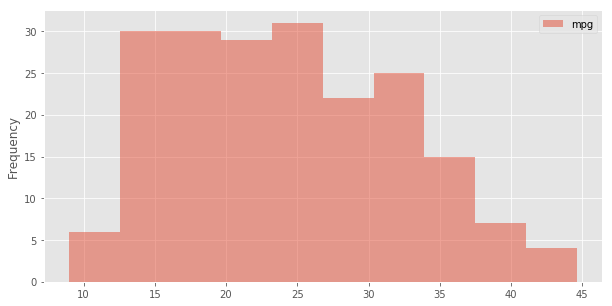

In [16]:
# plotを試してみる
# ▲matplotlib（plt）使ってないな？
# ⇒これpandasのほうのplotだ、、

df3.plot(
    kind='hist',
    y='mpg',
    bins=10,
    figsize=(10,5),
    alpha=0.5
)

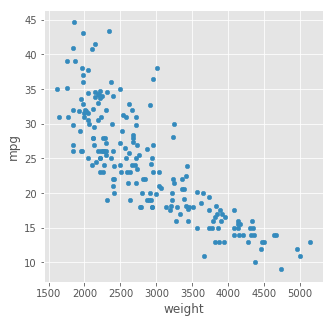

In [17]:
df3.plot(
    kind='scatter',
    x='weight',
    y='mpg',
    figsize=(5,5)
)